In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
# import cleaned merged data
data = pd.read_csv("Resources/data.csv")

## Primary Analysis

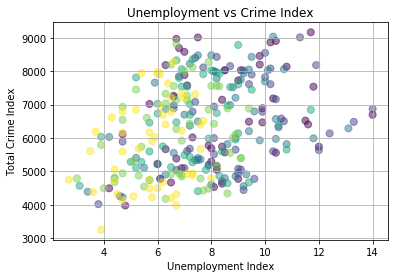

<Figure size 432x288 with 0 Axes>

In [3]:
# plot Unemployment Index and Total crime Index 
x_axis = data["Avg UI"]
crime_rate = data["Total Crime Rate"]
plt.xlabel("Unemployment Index")
plt.ylabel("Total Crime Index")
plt.title("Unemployment vs Crime Index")

c = data["Year"]
plt.grid()
plt.scatter(x_axis, crime_rate, marker="o", c=c, s=50, alpha=0.5)
plt.show()
plt.savefig("plots/Unemployment and Crime index.png")

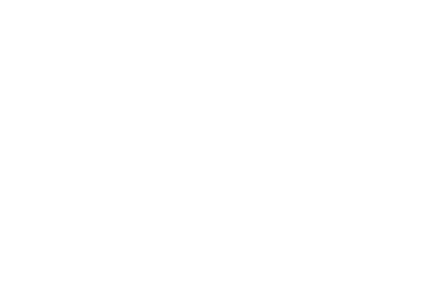

In [4]:
Image("plots/Actual Min wage with CPI.png")

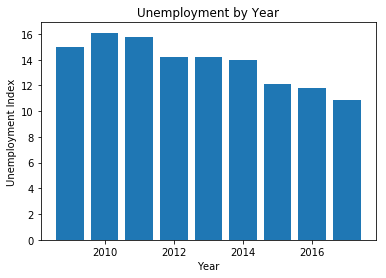

In [5]:
# plot bar of year vs unemployment 

plt.bar(data["Year"], data["Avg UI"],)
plt.title("Unemployment by Year")
plt.xlabel("Year")
plt.ylabel("Unemployment Index")
plt.savefig("plots/Unemployment by year.png")

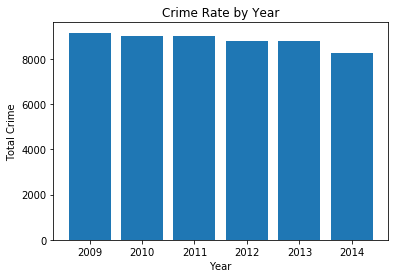

In [6]:
# plot a bar chart of year and crime index

plt.bar(data["Year"], data["Total Crime Rate"],)
plt.title("Crime Rate by Year")
plt.xlabel("Year")
plt.ylabel("Total Crime")
plt.savefig("plots/Crime Rate by Year.png")

## Changing the data to group in bins

In [7]:
data1 = data.replace({"Avg UI":0},None)
data1 = data1.dropna()

In [8]:
#Pivoted tables to find %age change
average_UI = data1.pivot(index= 'Year', columns = 'State', values = 'Avg UI')
crimerate = data1.pivot(index= 'Year', columns = 'State', values = 'Total Crime Rate')
adjusted_minwage = data1.pivot(index= 'Year', columns = 'State', values = 'High.2018')

In [9]:
# Percentage change in crime with respect to 2009 (earliest year being used
crimeratechange =  (crimerate/crimerate.iloc[0]) * 100
crimedrop = pd.DataFrame(crimeratechange.iloc[5,:])
crimedrop = crimedrop.round(2)
# crimedrop.sort_values(by=2014, kind = 'quicksort')
# #Binning of data in 5 quinitiles
# statebin= pd.qcut(crimeratechange.iloc[5,], 5, labels=["Very High", "High", "Medium", "Low", "Very Low"])

In [10]:
#Binning of data in 3 quinitiles
statebin= pd.qcut(crimeratechange.iloc[5,], 3, labels=["High", "Medium", "Low"])

#storing bin as DF to merge it with existing data and renaming columns
statebin= pd.DataFrame(statebin)
binneddata = data1.merge(statebin, how="inner", on = "State", left_index = False)
binneddata = pd.DataFrame.rename(binneddata, columns={2014:"Bins", "High.2018":"Adj Min Wage"})
binneddata.drop(columns= "Unnamed: 0", inplace = True)

#Using binned groups for creating those plots
binned = binneddata.groupby(["Bins"])

In [11]:
# Preview Data
binned.head(1)
#looks good

,State,Year,Avg UI,High.Value,Low.Value,CPI.Average,Adj Min Wage,Low.2018,Total Crime Rate,Bins
0,Alabama,2009,9.8,7.25,7.25,214.537,8.46,8.46,8460.9,Medium
6,Alaska,2009,8.4,7.15,7.15,214.537,8.35,8.35,7147.5,Low
36,Connecticut,2009,8.0,8.00,8.00,214.537,9.34,9.34,5298.6,High


<Figure size 432x288 with 0 Axes>

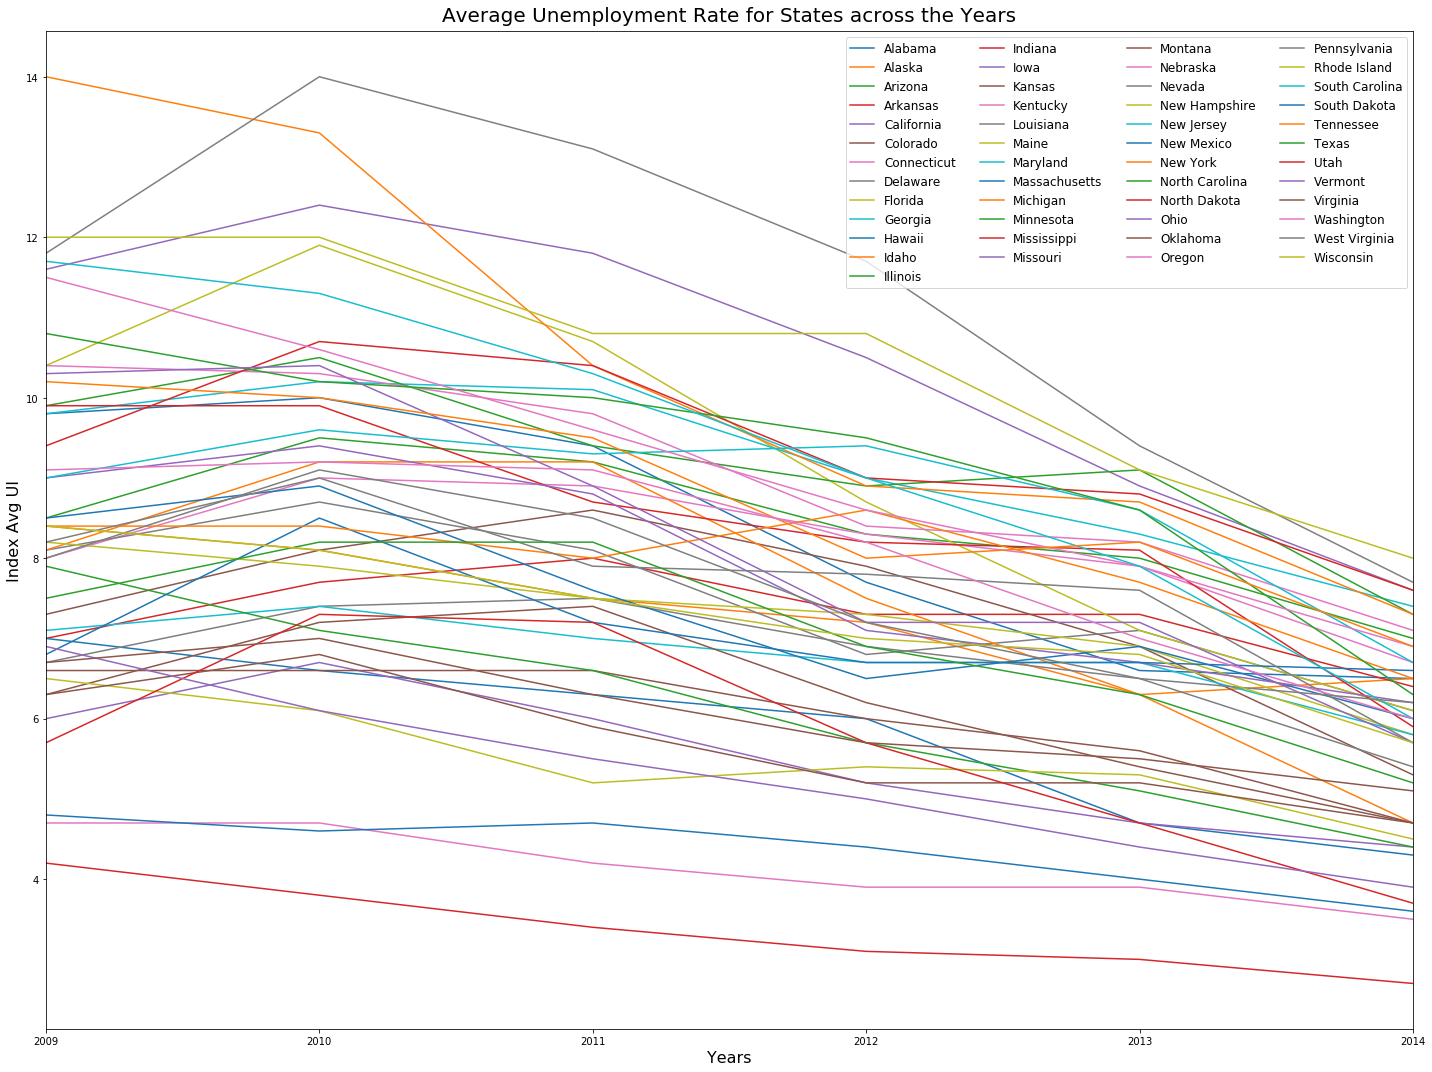

<Figure size 432x288 with 0 Axes>

In [12]:
#Plotting all States for UI - spaghetting map
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binneddata.groupby(['State']):
    ax = grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, figsize = (20, 15))

ax.set_xlabel('Years', fontsize = 16)
ax.set_ylabel('Index Avg UI', fontsize = 16)
ax.set_title("Average Unemployment Rate for States across the Years", fontsize = 20, pad = 10)
plt.tight_layout()
plt.legend(loc='best', ncol = 4, fontsize = 12)
plt.show()
plt.savefig("plots/UI_States.png")

<Figure size 432x288 with 0 Axes>

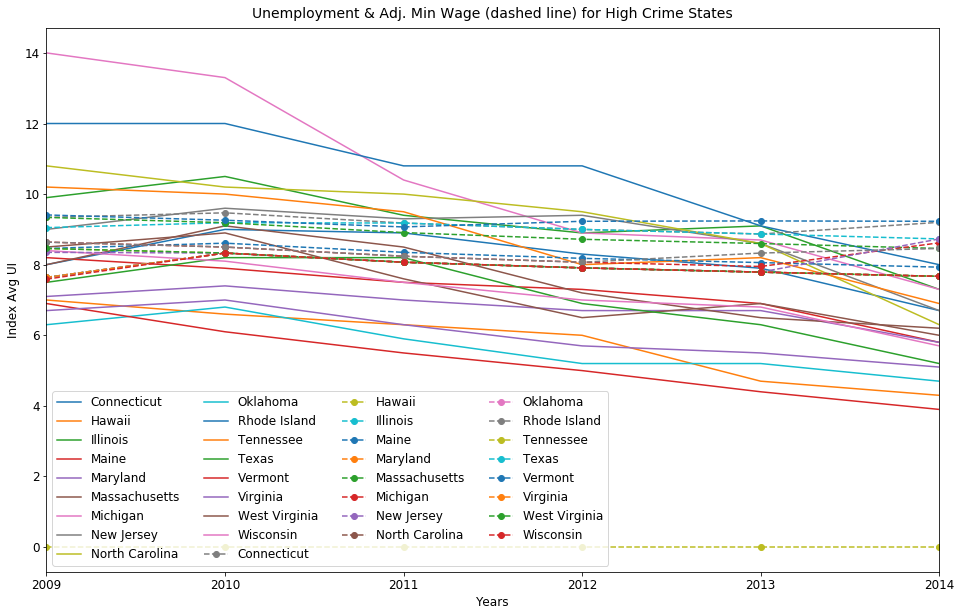

In [13]:
#Plots for High Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('High').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('High').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Adj Min Wage', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )
# plt.legend(None)
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for High Crime States", fontsize = 14, pad=10)
plt.legend(loc='best', ncol = 4, fontsize = 12)
plt.savefig("plots/UI_wage_States_High.png")

<Figure size 432x288 with 0 Axes>

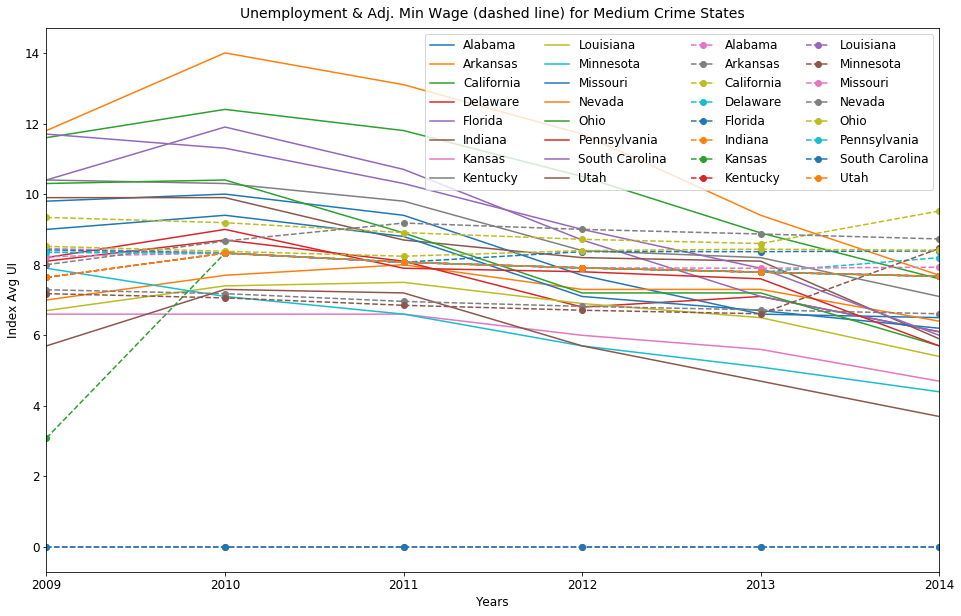

In [14]:
#Plots for Medium Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('Medium').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('Medium').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Adj Min Wage', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )

ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for Medium Crime States", fontsize = 14, pad=10)
plt.legend(loc='best', ncol = 4, fontsize = 12)
plt.savefig("plots/UI_wage_States_Medium.png")

<Figure size 432x288 with 0 Axes>

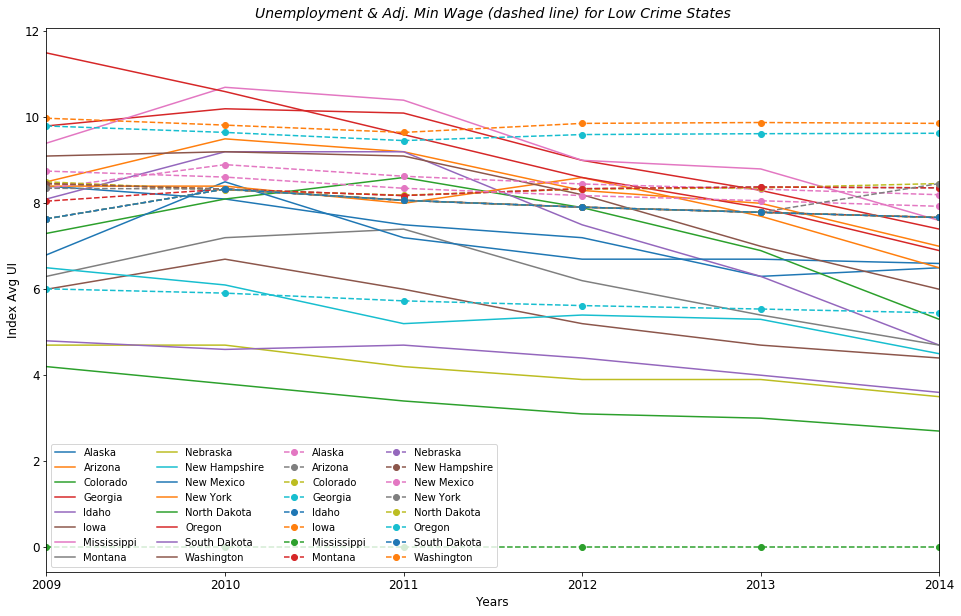

In [15]:
#Plots for Low Crime Rate states 
fig = plt.figure()
fig, ax = plt.subplots()

for State, grp in binned.get_group('Low').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Avg UI', label=State, 
                  figsize = (16, 10), fontsize = 12 )

for State, grp in binned.get_group('Low').groupby(['State']):
    grp.plot(ax=ax, kind='line', x='Year', y='Adj Min Wage', label=State, 
                  figsize = (16, 10), fontsize = 12, marker='o', linestyle='dashed' )
# plt.legend(None)
ax.set_xlabel('Years', fontsize = 12)
ax.set_ylabel('Index Avg UI', fontsize = 12)
ax.set_title("Unemployment & Adj. Min Wage (dashed line) for Low Crime States", fontsize = 14, pad=10, style='italic')
# ax.annotate(s = State, xy=(2010,8))
plt.legend(loc='best', ncol = 4, fontsize = 10)
plt.savefig("plots/UI_wage_States_Low.png")

C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


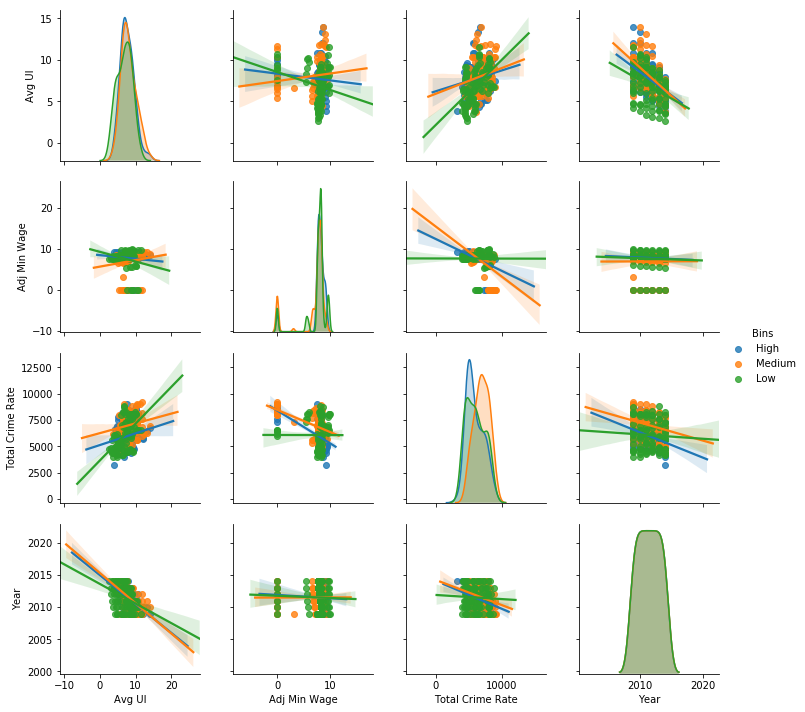

In [16]:
import seaborn as sns
sns.pairplot(binneddata, vars= ["Avg UI", "Adj Min Wage", "Total Crime Rate", "Year"], kind = "reg", hue = "Bins", palette=None)

plt.savefig("plots/pairedrelationbinned.png")

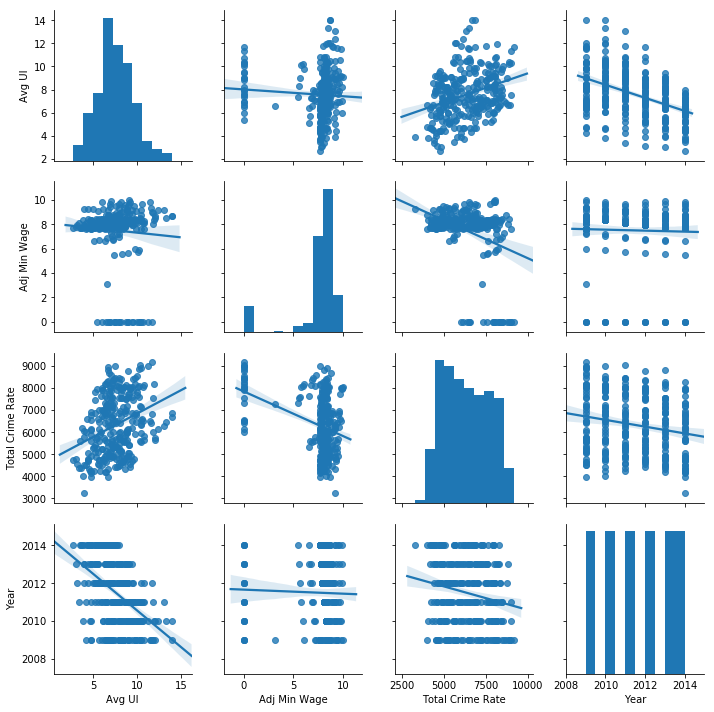

In [17]:
sns.pairplot(binneddata, vars= ["Avg UI", "Adj Min Wage", "Total Crime Rate", "Year"], kind = "reg")#, hue = "Bins", palette=None)

plt.savefig("plots/pairedrelation.png")

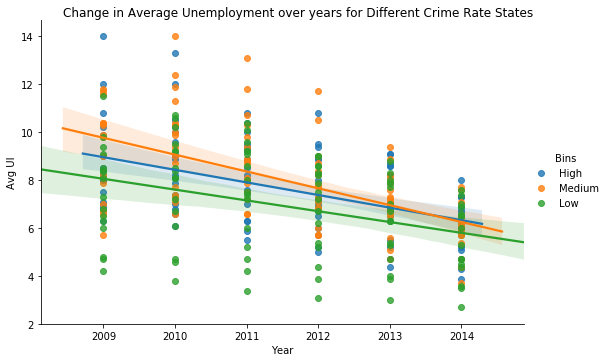

In [18]:
#Checking if there is a relation of Avg UI with Crime Rate states
ax = sns.lmplot(x = "Year", y="Avg UI",
            hue="Bins", aspect=1.5, #kind="swarm",(argument for catplot)
            data=binneddata, fit_reg=True, robust=True)
ax.fig.suptitle("Change in Average Unemployment over years for Different Crime Rate States", va = 'center')
plt.savefig("plots/Avg UI_binned_fit.png")

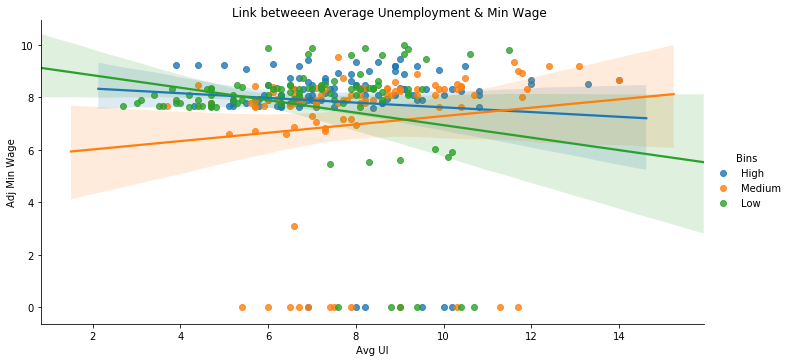

In [19]:
#Checking if there is a relation of Avg UI & Min Wage with Crime Rate states
ax = sns.lmplot(x="Avg UI", y="Adj Min Wage",
#             col="Year", kind="swarm", (for catplot arguments)
            hue="Bins", aspect=2,
            data=binneddata)
ax.fig.suptitle("Link betweeen Average Unemployment & Min Wage", va = 'center')
plt.savefig("plots/Yearflow_UI_wage_binned.png")

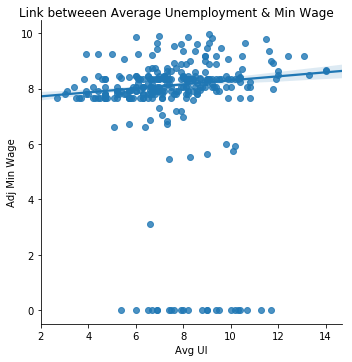

In [20]:
#Checking if there is a relation of Avg UI & Min Wage without Crime Rate states' distinction
ax = sns.lmplot(x="Avg UI", y="Adj Min Wage",aspect=1,
#             col="Year", kind="swarm", (for catplot arguments)hue="Bins", 
            data=binneddata, robust = True)
ax.fig.suptitle("Link betweeen Average Unemployment & Min Wage", va = 'center')
plt.savefig("plots/Yearflow_UI_wage.png")

In [21]:
# import statsmodels.formula.api as sm

# # Note that this model is not the plot displayed above: it is one
# # joined model for male and female, not separate models for male and
# # female. The reason is that a single model enables statistical testing
# result = sm.ols(formula='Total Crime Rate ~ Avg UI + Adj Min Wage', data=binneddata).fit()
# print(result.summary())

SyntaxError: invalid syntax (<unknown>, line 1)

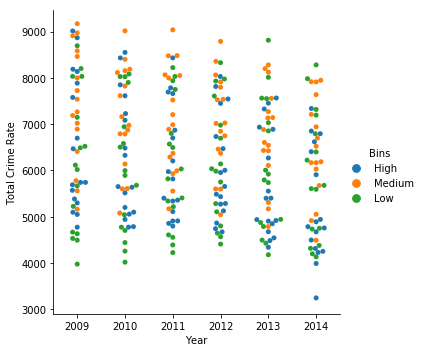

In [22]:
sns.catplot(x="Year", y="Total Crime Rate", data=binneddata[binneddata["Year"]<2015], legend = True, kind = "swarm", hue = "Bins")
plt.savefig('plots/Crime Rate Over years.png')
plt.set_title = "Crime Rate Over years"